In [54]:
from itertools import product

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors

from download_data import download_price_data

In [96]:
column_def = pd.read_csv("../data/column_def.csv")
column_def

,name,description
0,maturity_target,The time-to-expiry target for options selection
1,mu,The mean of the MPD; mu = sum(probability at ...
2,sd,The standard deviation of the MPD; sd = sqrt(...
3,skew,The skew of the MPD; skew = sum(probability a...
4,kurt,The kurtosis of the MPD; kurt = sum(probabili...
5,p10,The 10th percentile of the MPD
6,p50,The 50th percentile of the MPD
7,p90,The 90th percentile of the MPD
8,lg_change_prob,The change in the expected return in percentag...
9,prDec,"The probability of a ""large decline"" in return..."


In [2]:
data = pd.read_csv("../data/mpd_stats.csv")
ticker_def = pd.read_csv("../data/ticker_def.csv", index_col=["ticker"])

data = data.merge(ticker_def, left_on=["market"], right_index=True, how="left")
data.loc[:, "idt"] = pd.to_datetime(data["idt"])
# data.set_index(["market", "idt"], inplace=True)

data

,market,idt,maturity_target,mu,sd,skew,kurt,p10,p50,p90,lg_change_decr,prDec,lg_change_incr,prInc,name,type
0,bac,2010-01-15 00:00:00,3.0,-0.02514,0.18210,-0.38173,0.85192,-0.25389,-0.01634,0.19272,-20.0,0.14898,20.0,0.09307,Bank of America Corporation,equity
1,bac,2010-01-29 00:00:00,3.0,-0.02194,0.21265,-0.79513,1.61552,-0.28826,0.00001,0.21786,-20.0,0.16750,20.0,0.12009,Bank of America Corporation,equity
2,bac,2010-02-12 00:00:00,3.0,-0.01699,0.21625,-0.86181,1.83248,-0.28670,0.00720,0.22358,-20.0,0.16404,20.0,0.12713,Bank of America Corporation,equity
3,bac,2010-02-26 00:00:00,3.0,-0.00965,0.17893,-0.70108,1.40641,-0.23570,0.00776,0.19373,-20.0,0.12882,20.0,0.09233,Bank of America Corporation,equity
4,bac,2010-03-15 00:00:00,3.0,0.00006,0.17357,-0.71889,1.63480,-0.21657,0.01649,0.19608,-20.0,0.11325,20.0,0.09545,Bank of America Corporation,equity
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12180,yen,2023-12-13 00:00:00,3.0,0.01172,0.05115,-0.00129,0.56056,-0.05337,0.01237,0.07373,-10.0,0.01864,10.0,0.04210,Yen-USD exchange rate (CME),fx
12181,yen,2023-12-20 00:00:00,3.0,0.01158,0.04935,-0.00492,0.60823,-0.05116,0.01244,0.07113,-10.0,0.01601,10.0,0.03706,Yen-USD exchange rate (CME),fx
12182,yen,2023-12-27 00:00:00,3.0,0.01122,0.05123,0.02646,0.44396,-0.05416,0.01154,0.07408,-10.0,0.01777,10.0,0.04159,Yen-USD exchange rate (CME),fx
12183,yen,2024-01-03 00:00:00,3.0,0.01125,0.05054,-0.11415,0.49371,-0.05384,0.01258,0.07249,-10.0,0.02003,10.0,0.03719,Yen-USD exchange rate (CME),fx


In [93]:
data[["market", "type"]].drop_duplicates().groupby("type").count()

,market
type,
commodity,6
equity,2
equity_idx,3
fx,3
inflation,3
rate,4


In [94]:
equity = data.loc[data["type"].isin(["equity", "equity_idx"])]
tickers = equity["market"].unique()
start_date, end_date = equity["idt"].min(), equity["idt"].max()
print(tickers)
print(start_date, end_date)

['bac' 'citi' 'iyr' 'sp12m' 'sp6m']
2007-01-12 00:00:00 2024-01-10 00:00:00


In [4]:
equity.groupby("market").first()

,idt,maturity_target,mu,sd,skew,kurt,p10,p50,p90,lg_change_decr,prDec,lg_change_incr,prInc,name,type
market,,,,,,,,,,,,,,,
bac,2010-01-15 00:00:00,3.0,-0.025140,0.182100,-0.381730,0.851920,-0.253890,-0.016340,0.192720,-20.0,0.148980,20.0,0.093070,Bank of America Corporation,equity
citi,2010-01-15 00:00:00,3.0,-0.027030,0.216670,-0.126270,1.298230,-0.289140,-0.022310,0.226320,-20.0,0.182470,20.0,0.123160,"Citigroup, Inc.",equity
iyr,2010-10-29 00:00:00,3.0,-0.015380,0.136965,-0.948440,1.454774,-0.196561,0.005729,0.135344,-20.0,0.097426,20.0,0.022713,iShares real estate index,equity_idx
sp12m,2007-01-12 00:00:00,12.0,0.034318,0.132616,-1.055814,1.657518,-0.142450,0.057748,0.176416,-20.0,0.061515,20.0,0.056906,"S&P 500, 12-months-out",equity_idx
sp6m,2007-01-12 00:00:00,6.0,0.018803,0.086435,-1.079705,1.837194,-0.095498,0.033820,0.111149,-20.0,0.024242,20.0,0.001915,"S&P 500, 6-months-out",equity_idx


Manually translate name -> stock ticker. SPX is not a tradeable asset, therefore using SPY ETF as approximation.

Also, we can't fetch BAC data with others, hence do it separately.

In [9]:
price_df_list = []
for t in [["BAC", "C"], ["IYR", "SPY"]]:
    price_df = download_price_data(tickers=t,     
                                   start_date=start_date, end_date=end_date)
    price_df_list.append(price_df)
    
price_df = pd.concat(price_df_list, axis=1)

In [13]:
close = price_df["adj_close"]

ticker,BAC,C,IYR,SPY
date,,,,
2007-01-12,38.141457,391.307311,46.614686,103.134094
2007-01-16,38.184329,394.113671,47.150674,102.932493
2007-01-17,38.098585,391.379269,47.291438,102.975691
2007-01-18,38.077150,391.379269,47.129018,102.630079
2007-01-19,38.291508,392.170807,47.545897,102.831692
...,...,...,...,...
2024-01-04,33.800000,53.770000,89.860000,467.280000
2024-01-05,34.430000,54.330000,89.660000,467.920000
2024-01-08,34.160000,54.010000,90.950000,474.600000


Since sp12m / sp6m get maturity = 12 / 6, we assume maturity means X-month and calculate log return for the period of maturity target.

In [40]:
# represent: bac, citi, iyr, sp6m, sp12m

log_ret = pd.DataFrame(index=close.index)
for t, m, prob_name in [("BAC", 3, "bac"), 
                        ("C", 3, "citi"), 
                        ("IYR", 3, "iyr"), 
                        ("SPY", 6, "sp6m"), 
                        ("SPY", 12, "sp12m")]:
    close_shift = close.copy()
    close_shift.index = close_shift.index - pd.DateOffset(months=m)
    close_shift = close_shift.reset_index().drop_duplicates(subset="date", keep='last').set_index("date")
    idx = close_shift.index.intersection(close.index)
    log_ret.loc[:, prob_name] = np.log(close_shift.loc[idx, t].ffill() / close.loc[idx, t])
    
log_ret

,bac,citi,iyr,sp6m,sp12m
date,,,,,
2007-01-12,-0.048872,-0.041688,-0.004523,0.083206,NaN
2007-01-16,-0.031277,-0.024354,-0.005313,0.088009,-0.024546
2007-01-17,-0.027664,-0.024978,0.005914,0.087072,-0.051223
2007-01-18,-0.017016,-0.016259,0.005792,0.088623,-0.058182
2007-01-19,-0.040346,-0.016394,-0.011684,0.090538,NaN
...,...,...,...,...,...
2024-01-04,NaN,NaN,NaN,NaN,NaN
2024-01-05,NaN,NaN,NaN,NaN,NaN
2024-01-08,NaN,NaN,NaN,NaN,NaN


In [43]:
comp = pd.concat([
    equity.set_index(["market", "idt"])[["prDec", "prInc"]],
    log_ret.unstack().rename("log_return")
], axis=1)
comp

prDec    prInc  log_return
bac   2010-01-15  0.14898  0.09307    0.181291
      2010-01-29  0.16750  0.12009    0.187533
      2010-02-12  0.16404  0.12713    0.167239
      2010-02-26  0.12882  0.09233   -0.073497
      2010-03-15  0.11325  0.09545   -0.063775
...                   ...      ...         ...
sp12m 2024-01-02      NaN      NaN         NaN
      2024-01-04      NaN      NaN         NaN
      2024-01-05      NaN      NaN         NaN
      2024-01-08      NaN      NaN         NaN
      2024-01-09      NaN      NaN         NaN

[21395 rows x 3 columns]

In [50]:
comp.index.names = ("ticker", "date")

[<Axes: xlabel='prDec', ylabel='log_return'>,
 <Axes: xlabel='prDec', ylabel='log_return'>,
 <Axes: xlabel='prDec', ylabel='log_return'>,
 <Axes: xlabel='prDec', ylabel='log_return'>,
 <Axes: xlabel='prDec', ylabel='log_return'>]

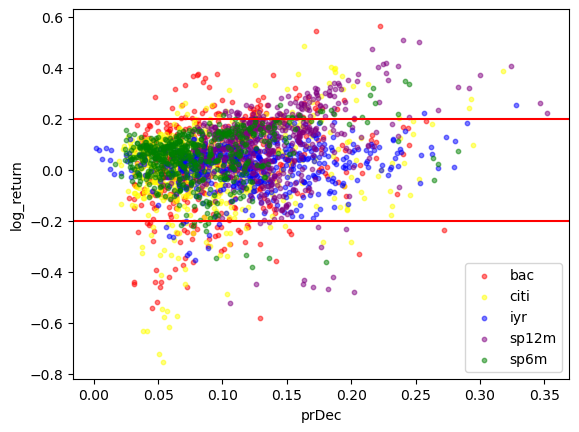

In [61]:
color_map = {"bac": "red", "citi": "yellow", "iyr": "blue", "sp6m": "green", "sp12m": "purple"}

fig, ax = plt.subplots()
ax.axhline(y=0.2, c="red")
ax.axhline(y=-0.2, c="red")
[g.plot.scatter(
    x="prDec", y="log_return", ax=ax, s=10, label=name,
    color=color_map[name], alpha=0.5
) for name, g in comp.groupby("ticker")]

[<Axes: xlabel='prInc', ylabel='log_return'>,
 <Axes: xlabel='prInc', ylabel='log_return'>,
 <Axes: xlabel='prInc', ylabel='log_return'>,
 <Axes: xlabel='prInc', ylabel='log_return'>,
 <Axes: xlabel='prInc', ylabel='log_return'>]

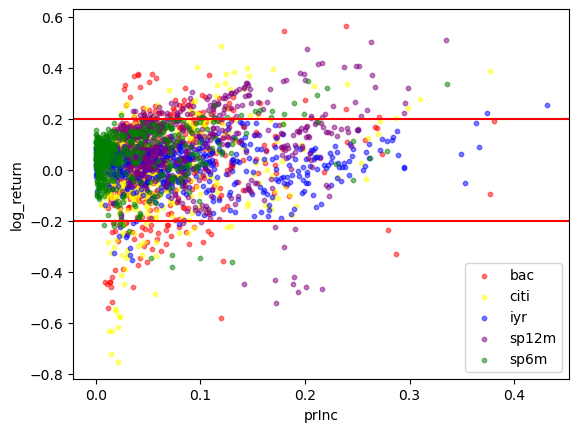

In [62]:
color_map = {"bac": "red", "citi": "yellow", "iyr": "blue", "sp6m": "green", "sp12m": "purple"}

fig, ax = plt.subplots()
ax.axhline(y=0.2, c="red")
ax.axhline(y=-0.2, c="red")
[g.plot.scatter(
    x="prInc", y="log_return", ax=ax, s=10, label=name,
    color=color_map[name], alpha=0.5
) for name, g in comp.groupby("ticker")]

In [67]:
comp.loc[:, "large_change"] = np.select(
    [comp["log_return"] > 0.2, comp["log_return"] < -0.2],
    [1, -1],
    default=0
)
comp.groupby(["ticker", "large_change"])[["prDec", "prInc"]].mean().unstack()

prDec                         prInc                    
large_change        -1         0         1        -1         0         1
ticker                                                                  
bac           0.086063  0.091016  0.119336  0.057964  0.063623  0.090332
citi          0.077487  0.090387  0.161604  0.038278  0.057358  0.130488
iyr           0.074588  0.121214  0.292425  0.033635  0.089802  0.402630
sp12m         0.162295  0.130858  0.175514  0.169249  0.095755  0.137129
sp6m          0.103495  0.078401  0.181974  0.050204  0.030074  0.157240

Both plot and average probability in different actual log return scenario shows:
- prDec / prInc are only positively correlated with log return (correct only in case of prInc)
- SPY has a skewed convex shape, i.e. when no large change log_return, both prDec / prInc are low (this is correct). However, when there is a large change both prInc / prDec has large value. 

Our strategy maybe more related to volatility? i.e. large change or no change
e.g. spread trading but adjusting price band size regularly based on probability estimation

### Probability Correlation

<Axes: xlabel='market', ylabel='market'>

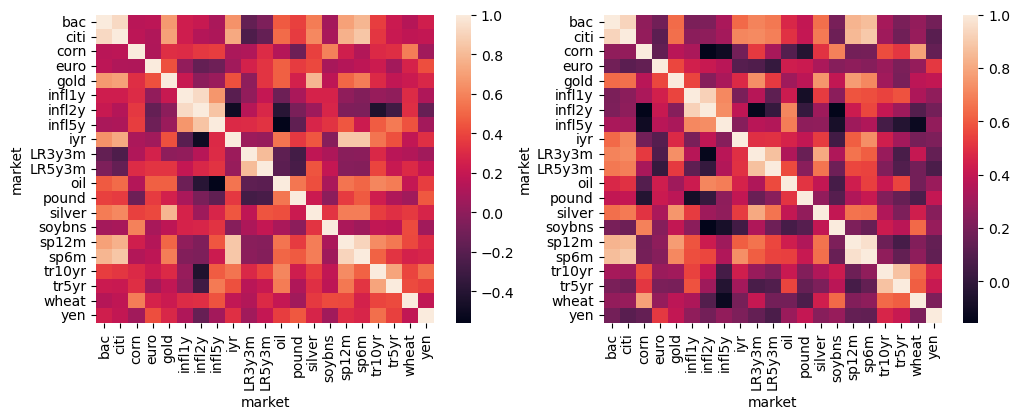

In [91]:
from seaborn import heatmap
unique_tickers = data["market"].unique()

inc_corr = data.set_index(["idt", "market"])["prInc"].unstack().corr().reindex(unique_tickers).T.reindex(unique_tickers).T
dec_corr = data.set_index(["idt", "market"])["prDec"].unstack().corr().reindex(unique_tickers).T.reindex(unique_tickers).T


fig, ax = plt.subplots(1, 2, figsize=(12, 4))

heatmap(inc_corr, ax=ax[0])
heatmap(dec_corr, ax=ax[1])

In [83]:
inc_corr_unstack = inc_corr.unstack().sort_values()
inc_corr_unstack = inc_corr_unstack.loc[inc_corr_unstack != 1]

pd.concat([
    inc_corr_unstack.head(),
    inc_corr_unstack.tail()
])

market  market
oil     infl5y   -0.558074
infl5y  oil      -0.558074
infl2y  iyr      -0.495354
iyr     infl2y   -0.495354
tr10yr  infl2y   -0.428932
sp6m    sp12m     0.902828
bac     citi      0.922992
citi    bac       0.922992
infl2y  infl1y    0.928834
infl1y  infl2y    0.928834
dtype: float64

In [84]:
dec_corr_unstack = dec_corr.unstack().sort_values()
dec_corr_unstack = dec_corr_unstack.loc[dec_corr_unstack != 1]

pd.concat([
    dec_corr_unstack.head(),
    dec_corr_unstack.tail()
])

market  market
corn    infl2y   -0.154837
infl2y  corn     -0.154837
soybns  infl2y   -0.150808
infl2y  soybns   -0.150808
        LR3y3m   -0.140856
infl1y  infl2y    0.921013
bac     citi      0.931003
citi    bac       0.931003
sp6m    sp12m     0.967133
sp12m   sp6m      0.967133
dtype: float64

# TODO
1. how about predict volatility / reversal 
2. how about max / min return during the period